In [3]:
import os
from md_diffusion import read_position_array
from msd_fft import calculate_diffusion_coefficient
import matplotlib.pyplot as plt
import numpy as np
import yaml

### Read log files

In [4]:
data_dir = '/home/kutay/Documents/git/Nanocar/diffusion/docs/data'

### Save numpy array and run diffusivity calcualtion

In [55]:
ALL_DATA = {}
for sim_type in ['flexible', 'rigid']:
    DATA = {}
    simdir = '%s/%s' % (data_dir, sim_type)
    for molecule in os.listdir(simdir):
        mol_simdir = os.path.join(simdir, molecule)
        pos_array = read_position_array(mol_simdir, directions=['x', 'y'], t_skip=0, log='log.%s' % molecule)
        DATA[molecule.split('_')[0]] = calculate_diffusion_coefficient(pos_array, average_frames=1, fs_per_frame=1000)
        DATA[molecule.split('_')[0]]['pos'] = pos_array
    ALL_DATA[sim_type] = DATA

Run ids:  {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
DC_Cu110 | Shape: (10001 frames, 10 runs, 2 dimensions) | Saved: None
Best fit: (3.00 - 5.00 ns; $R^2$ = 1.000):
D = 1.253E-04 $cm^2 / s$
Run ids:  {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
PCARBORANE_Cu110 | Shape: (10001 frames, 10 runs, 2 dimensions) | Saved: None
Best fit: (2.50 - 5.00 ns; $R^2$ = 1.000):
D = 1.902E-04 $cm^2 / s$
Run ids:  {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
C60_Cu110 | Shape: (10001 frames, 10 runs, 2 dimensions) | Saved: None
Best fit: (1.00 - 3.50 ns; $R^2$ = 0.995):
D = 1.044E-04 $cm^2 / s$
Run ids:  {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
TPEE_Cu110 | Shape: (10001 frames, 10 runs, 2 dimensions) | Saved: None
Best fit: (3.00 - 5.00 ns; $R^2$ = 0.999):
D = 1.540E-04 $cm^2 / s$
Run ids:  {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7

### Plot trajectory per run

In [64]:
sim_type = 'flexible'
mol = 'C60'
origin = [24.099941, 24.6716, 10.740822]

<p align="center"><img src="/assets/img/presentations/nanocar/c60-md-flexible-trajectory.png" height=250></p>


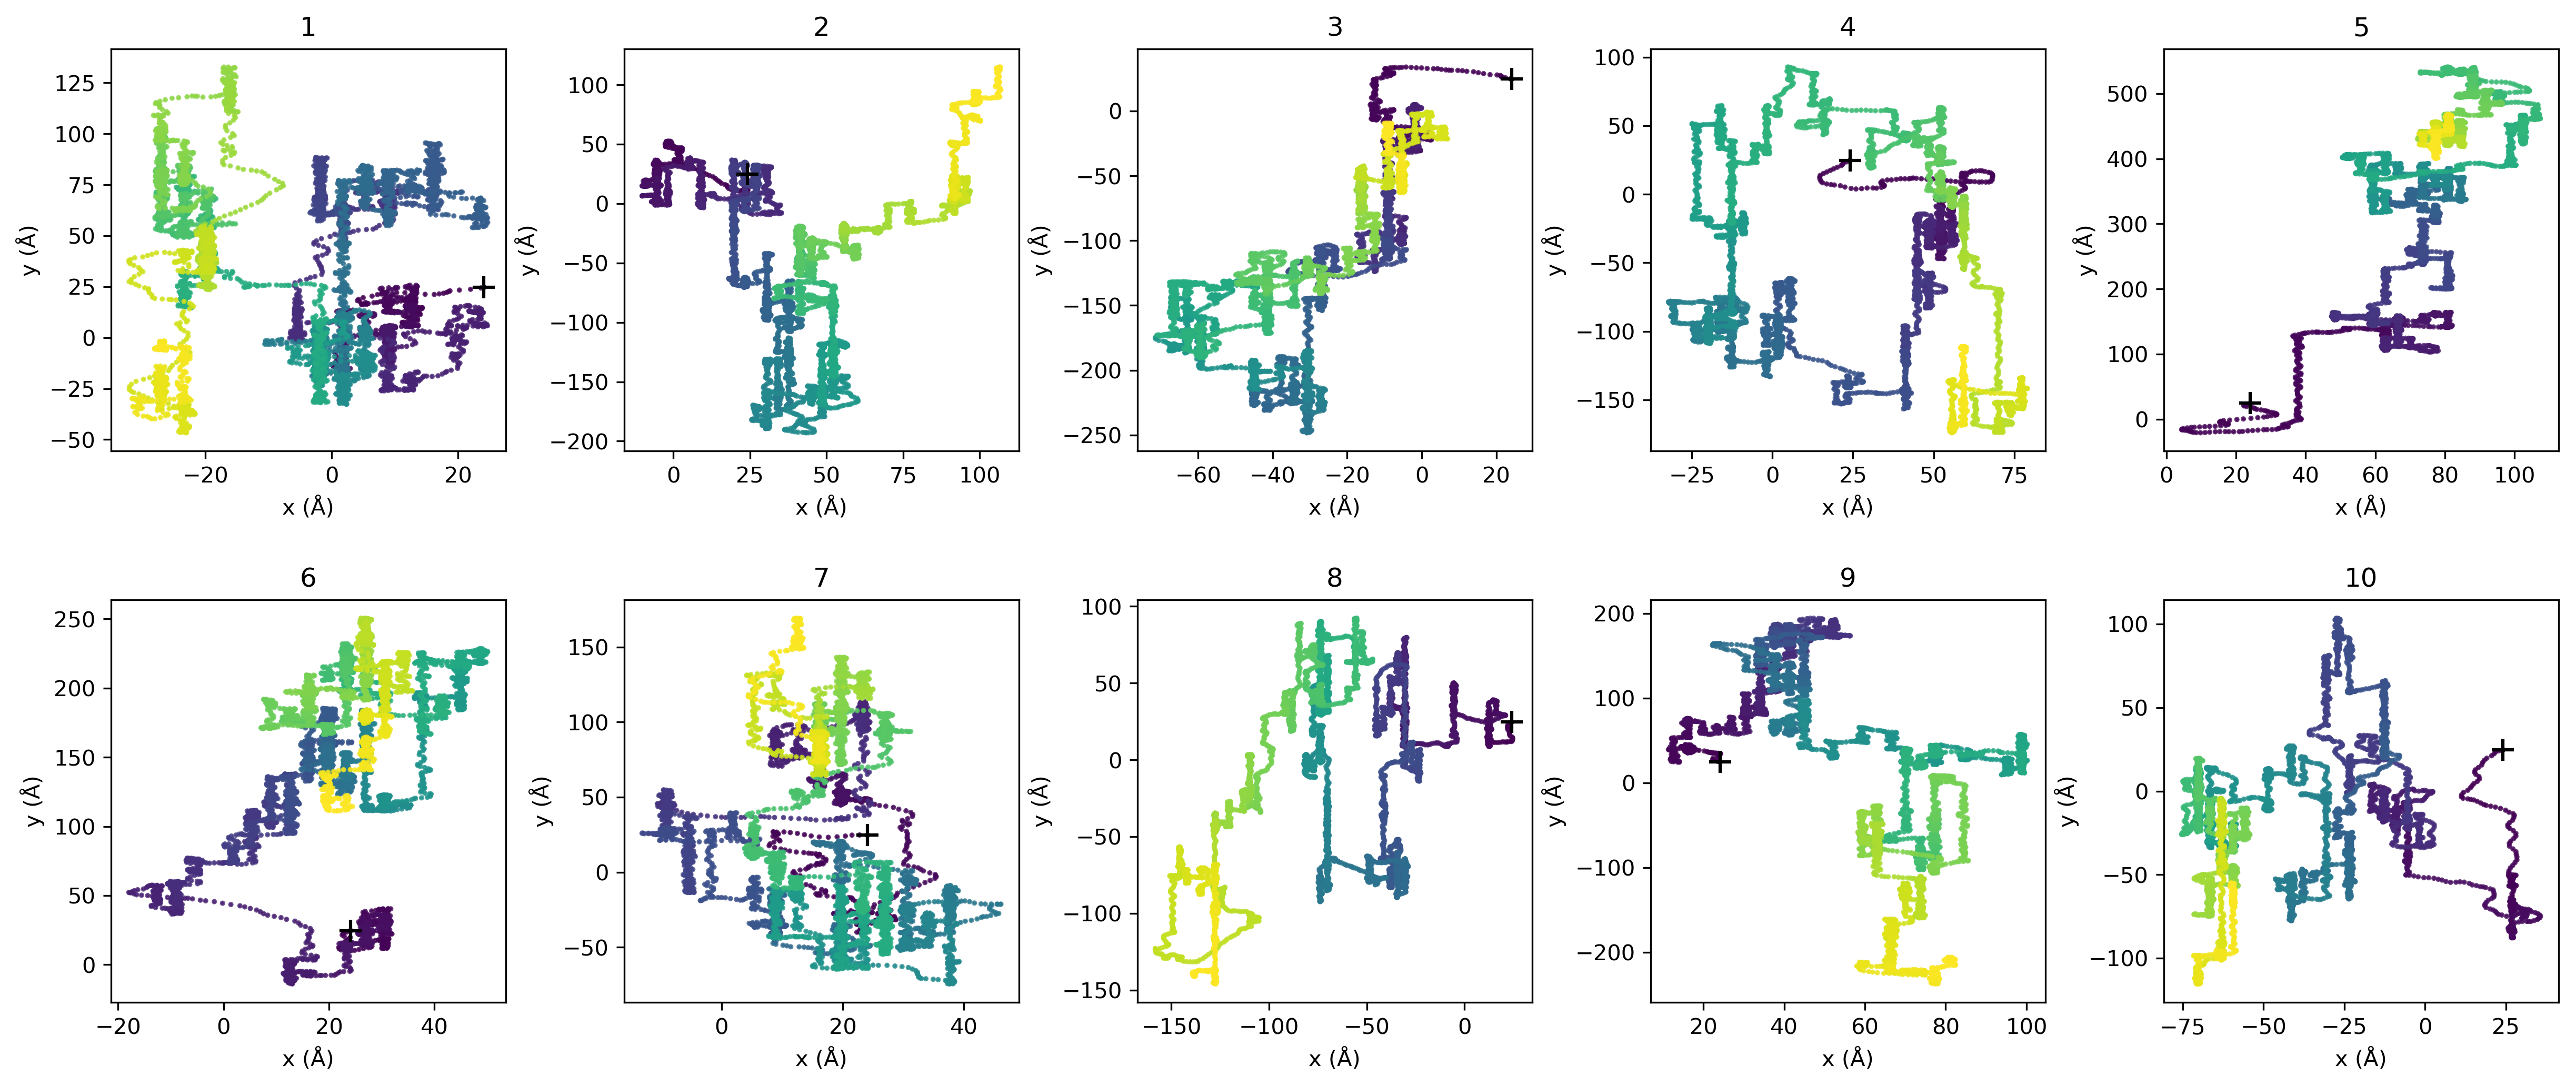

In [65]:
nrows = 2
cmap = plt.get_cmap('viridis')
nruns = ALL_DATA[sim_type][mol]['pos'].shape[1]
ncols = np.ceil(nruns / nrows)
fig = plt.figure(figsize=(ncols * 4, nrows * 4), dpi=300)
fig.subplots_adjust(wspace=0.3, hspace=0.37)

for run in range(nruns):
    ax = fig.add_subplot(nrows, ncols, run + 1)
    xpos = ALL_DATA[sim_type][mol]['pos'][:, run, 0]
    ypos = ALL_DATA[sim_type][mol]['pos'][:, run, 1]
    colors = [cmap(i / len(xpos)) for i in range(len(xpos))]
    ax.scatter(xpos, ypos, c=colors, s=2, alpha=0.8)
    ax.scatter([origin[0]], [origin[1]], marker='+', c='k', s=100, zorder=3)
    ax.set_title('%i' % (run + 1))
    ax.set_xlabel('x (Å)')
    ax.set_ylabel('y (Å)')
    

pltdir = '/home/kutay/Documents/git/kbsezginel.github.io/assets/img/presentations/nanocar'
pltname = '%s-md-%s-trajectory.png' % (mol.lower(), sim_type)
plt.savefig(os.path.join(pltdir, pltname), dpi=300, transparent=True, bbox_inches='tight')
print('<p align="center"><img src="/assets/img/presentations/nanocar/%s" height=250></p>' % pltname)

### Plot trajectory per molecule

In [66]:
sim_type = 'flexible'
run = 5
origin = [24.099941, 24.6716, 10.740822]

<p align="center"><img src="/assets/img/presentations/nanocar/md-flexible-molecule-trajectory.png" height=250></p>


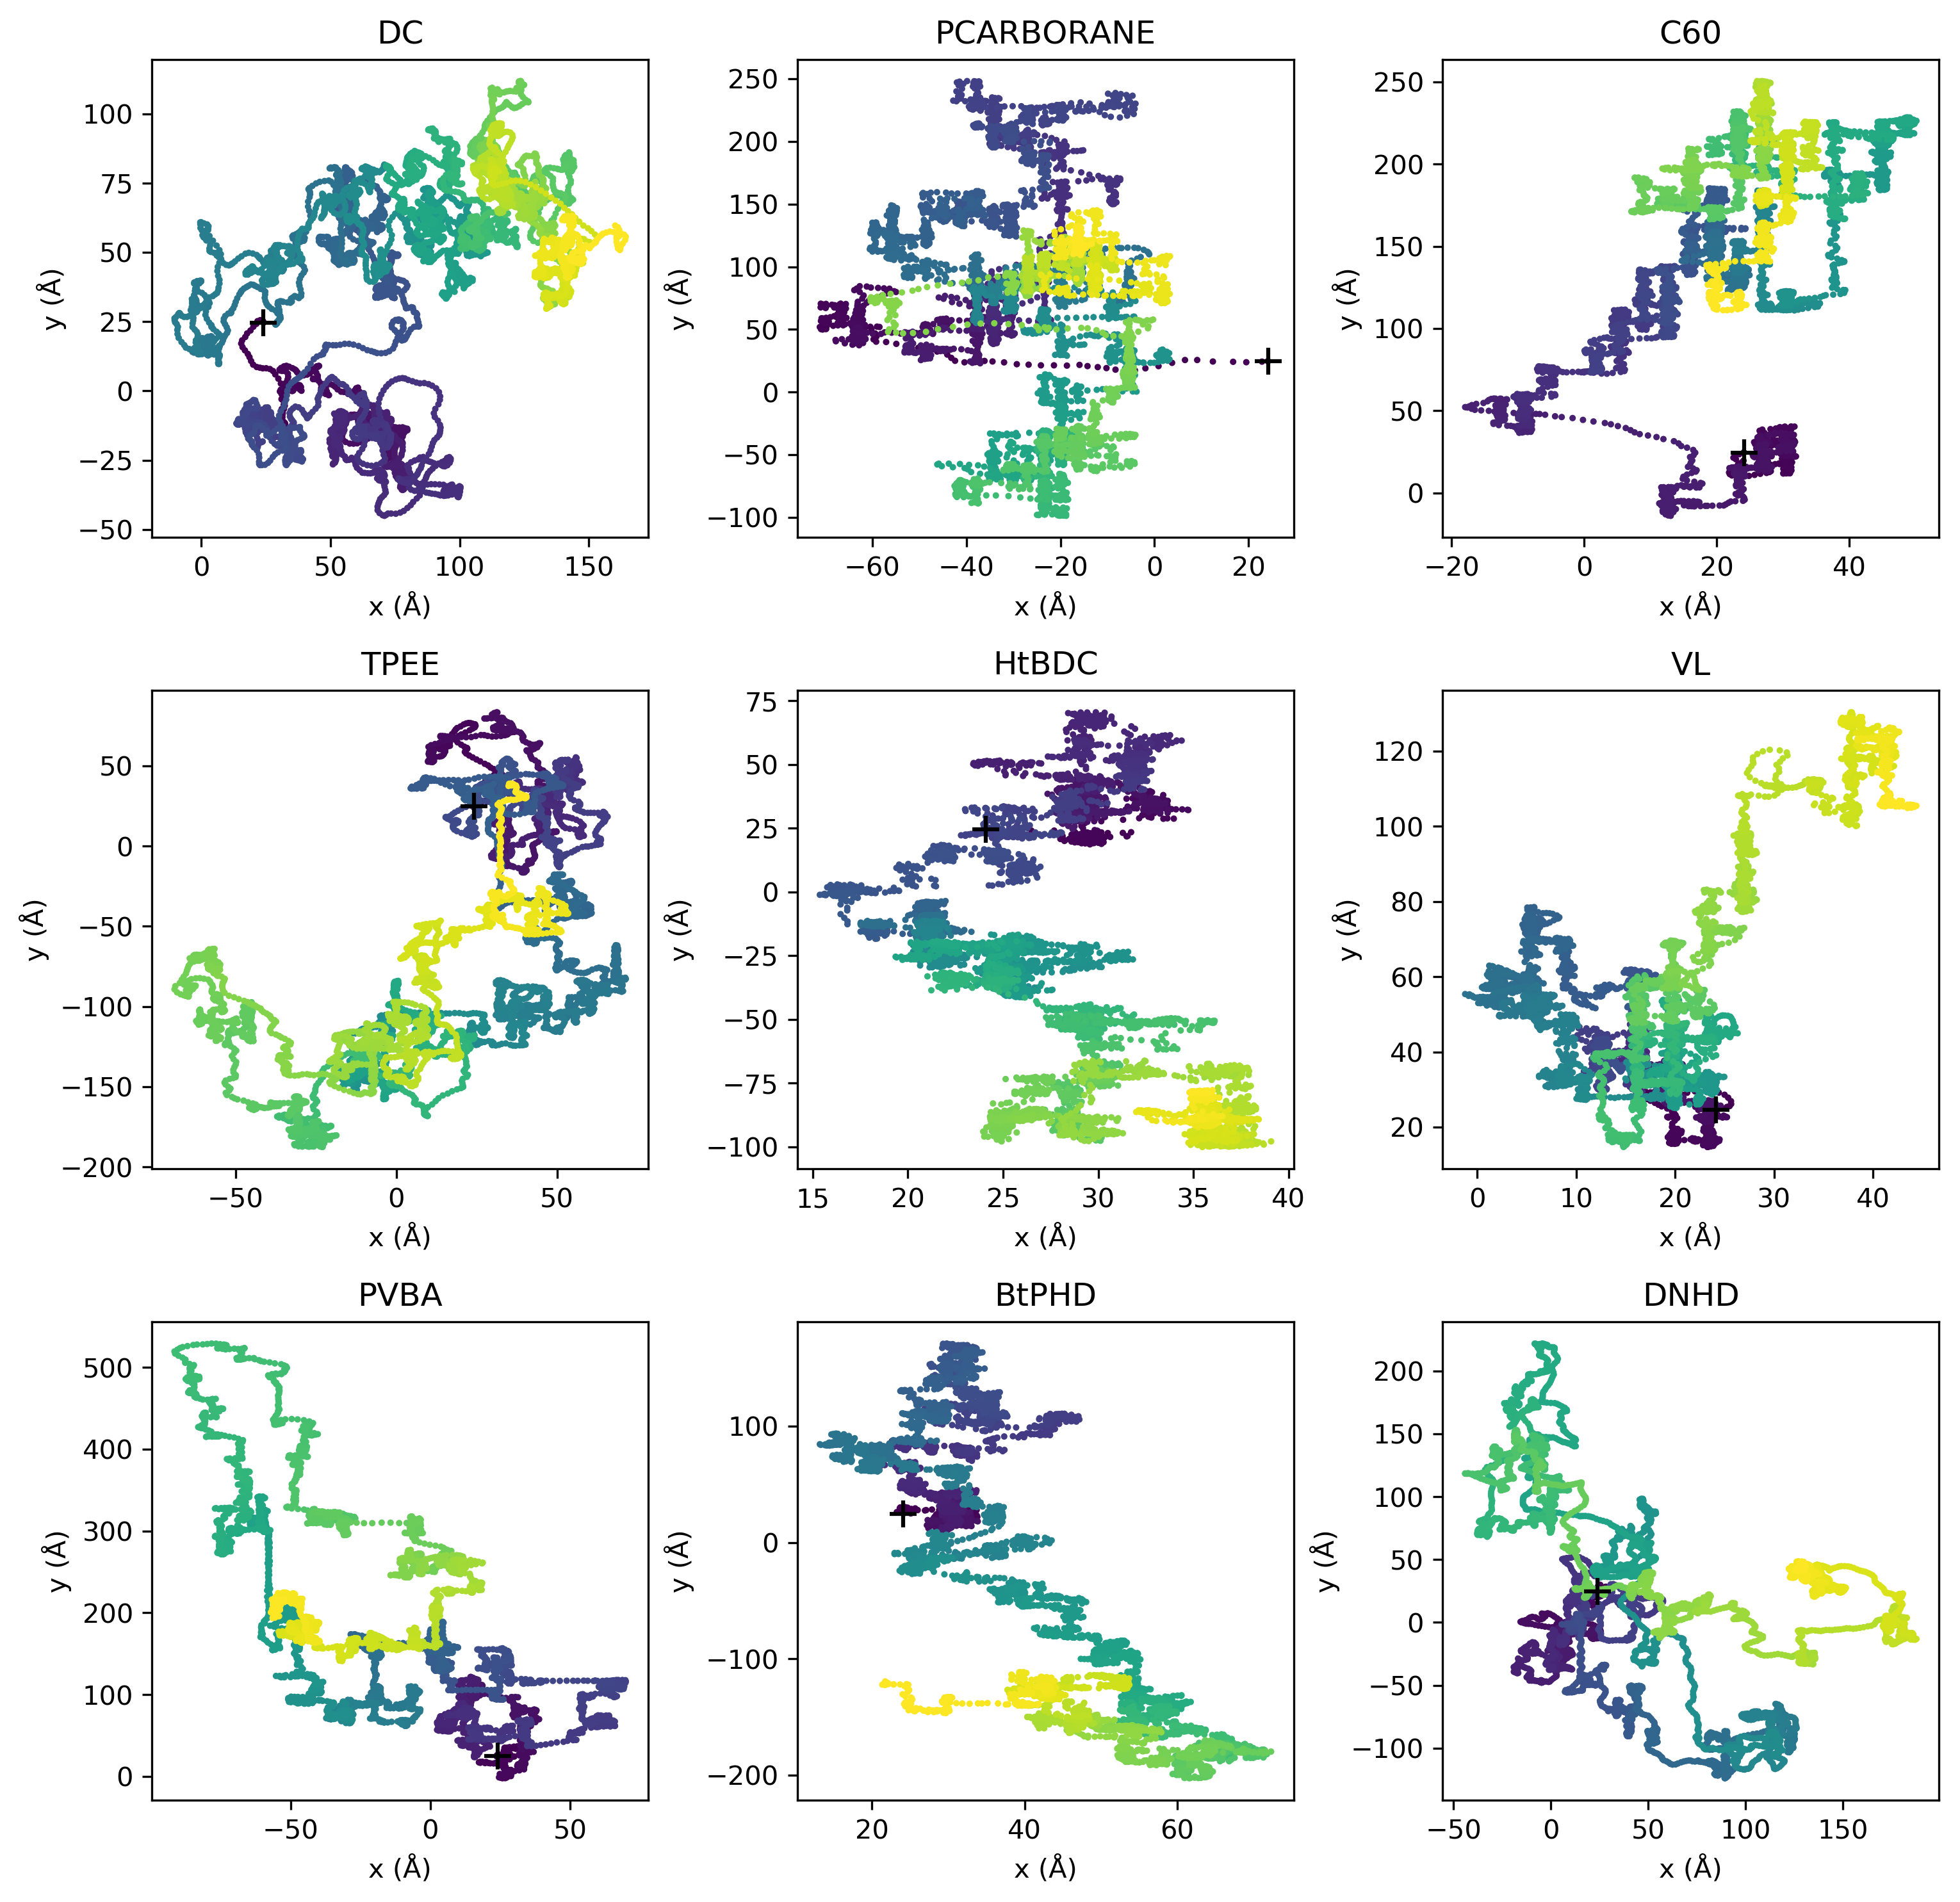

In [68]:
nrows = 3
cmap = plt.get_cmap('viridis')
nmols = len(ALL_DATA[sim_type].keys())
ncols = np.ceil(nmols / nrows)
fig = plt.figure(figsize=(ncols * 4, nrows * 4), dpi=300)
fig.subplots_adjust(wspace=0.3, hspace=0.32)

for idx, mol in enumerate(ALL_DATA[sim_type], start=1):
    ax = fig.add_subplot(nrows, ncols, idx)
    xpos = ALL_DATA[sim_type][mol]['pos'][:, run, 0]
    ypos = ALL_DATA[sim_type][mol]['pos'][:, run, 1]
    colors = [cmap(i / len(xpos)) for i in range(len(xpos))]
    ax.scatter(xpos, ypos, c=colors, s=2)
    ax.scatter([origin[0]], [origin[1]], marker='+', c='k', s=100, zorder=3)
    ax.set_title(mol)
    ax.set_xlabel('x (Å)')
    ax.set_ylabel('y (Å)')
    

pltdir = '/home/kutay/Documents/git/kbsezginel.github.io/assets/img/presentations/nanocar'
pltname = 'md-%s-molecule-trajectory.png' % sim_type
plt.savefig(os.path.join(pltdir, pltname), dpi=300, transparent=True, bbox_inches='tight')
print('<p align="center"><img src="/assets/img/presentations/nanocar/%s" height=250></p>' % pltname)